# HW-2 Dimensionality Reduction for Time Series Data

#### In this homework, the major aim is investigating the data collecting from eight users to characterize eight gesture patterns (Liu et al., 2009). For this purpose, the dataset is first visualized, then  reduced  to a univariate time series with a dimensionality reduction. Finally, multidimensional scaling is applied to the distance matrix which is calculated from position data and 2-dimensional time series are obtained.

## a) Reading and Visualizing Data

###### In this part, three seperate files for each axis (x, y, z) are read and one instance from each class is selected to visualize to understand what is going on and compared with the Gesture vocabulary considered by Liu et al. (2009).

In [2]:
#used libraries
library(tidyverse)
library(rgl)
library(scatterplot3d)
library(data.table)
library(tidyr)
library(MASS) 
library(reshape2) 
library(dplyr)
library(reshape2)
library(ggplot2)
library(scales)

In [3]:
#reading data
data_x = read.table("C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW2/uWaveGestureLibrary_X_TRAIN")
data_y = read.table("C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW2/uWaveGestureLibrary_Y_TRAIN")
data_z = read.table("C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW2/uWaveGestureLibrary_Z_TRAIN")
#class is determined as column name
colnames(data_x)[1] = "class"
colnames(data_y)[1] = "class"
colnames(data_z)[1] = "class"
len= ncol(data_x)
#time orders are determined as column name
for (i in c(2:len)){
    colnames(data_x)[i] =  i-1
    colnames(data_y)[i] =  i-1
    colnames(data_z)[i] =  i-1  
}
#Velocity and Position vectors are determined with the cumulative sum
#Velocity = cumulative sum of acceleration over time
#Position = cumulative sum of velocity over time

vel_x = t(apply(data_x[,-1], 1, cumsum))
pos_x = t(apply(vel_x, 1, cumsum))

vel_y = t(apply(data_y[,-1], 1, cumsum))
pos_y = t(apply(vel_y, 1, cumsum))

vel_z = t(apply(data_z[,-1], 1, cumsum))
pos_z = t(apply(vel_z, 1, cumsum))

#position and velocity datas are generated with cbind function
vel_x_data =cbind(data_x$class,vel_x)
pos_x_data =cbind(data_x$class,pos_x)
vel_y_data =cbind(data_y$class,vel_y)
pos_y_data =cbind(data_y$class,pos_y)
vel_z_data =cbind(data_z$class,vel_z)
pos_z_data =cbind(data_z$class,pos_z)
#position datas are turned into frame
pos_x_data = as.data.frame(pos_x_data)
pos_y_data = as.data.frame(pos_y_data)
pos_z_data = as.data.frame(pos_z_data)
#column names of position 1 are determined as class
colnames(pos_x_data)[1] = "class"
colnames(pos_y_data)[1] = "class"
colnames(pos_z_data)[1] = "class"
#selecting one instance from each class of the position data
pos_x_new = pos_x_data %>% distinct(class, .keep_all = TRUE)
pos_y_new = pos_y_data %>% distinct(class, .keep_all = TRUE)
pos_z_new = pos_z_data %>% distinct(class, .keep_all = TRUE)
#data is ordered according to class
pos_x_new = pos_x_new[order(pos_x_new$class), ]
pos_y_new = pos_y_new[order(pos_y_new$class), ]
pos_z_new = pos_z_new[order(pos_z_new$class), ]

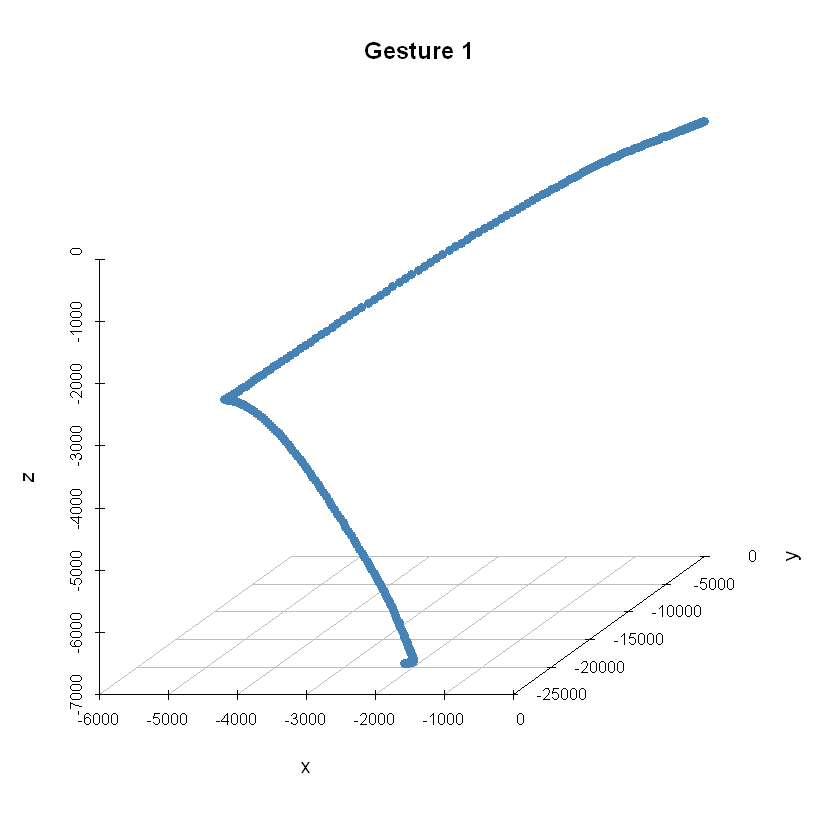

In [4]:
#visualize one instance from class 1
x_1= t(pos_x_new[1,-1])
y_1= t(pos_y_new[1,-1])
z_1= t(pos_z_new[1,-1])
comb_1 =cbind(x_1,y_1,z_1)
comb_1 = as.data.frame(comb_1)
colnames(comb_1)[1] = "x"
colnames(comb_1)[2] = "y"
colnames(comb_1)[3] = "z"
scatterplot3d(comb_1[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,main="Gesture 1")


###### When the graph is compared with the figure given in HW question, it is seen that this instance from gesture 1 shows similar pattern with the gesture 1.

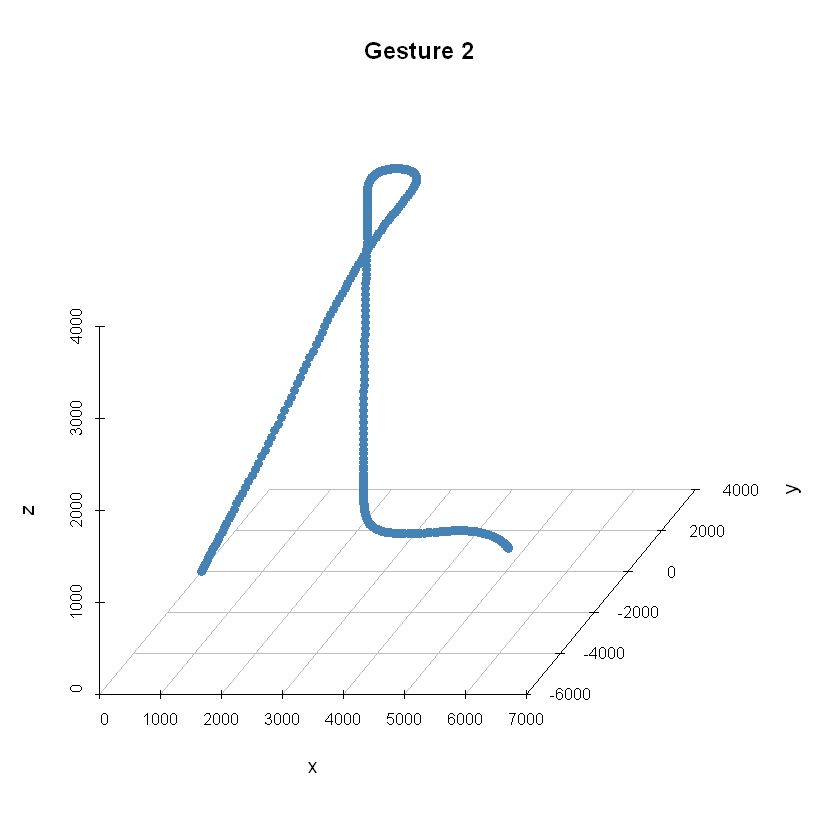

In [5]:
#visualize one instance from class 2
x_2= t(pos_x_new[2,-1])
y_2= t(pos_y_new[2,-1])
z_2= t(pos_z_new[2,-1])
comb_2 =cbind(x_2,y_2,z_2)
comb_2 = as.data.frame(comb_2)
colnames(comb_2)[1] = "x"
colnames(comb_2)[2] = "y"
colnames(comb_2)[3] = "z"
scatterplot3d(comb_2[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE ,main="Gesture 2")


###### Since this graph is three-dimensional graph, it does not look very similar with the figure of Gesture 2 at first. However, when we look at from the y axis, they are similiar with each other.

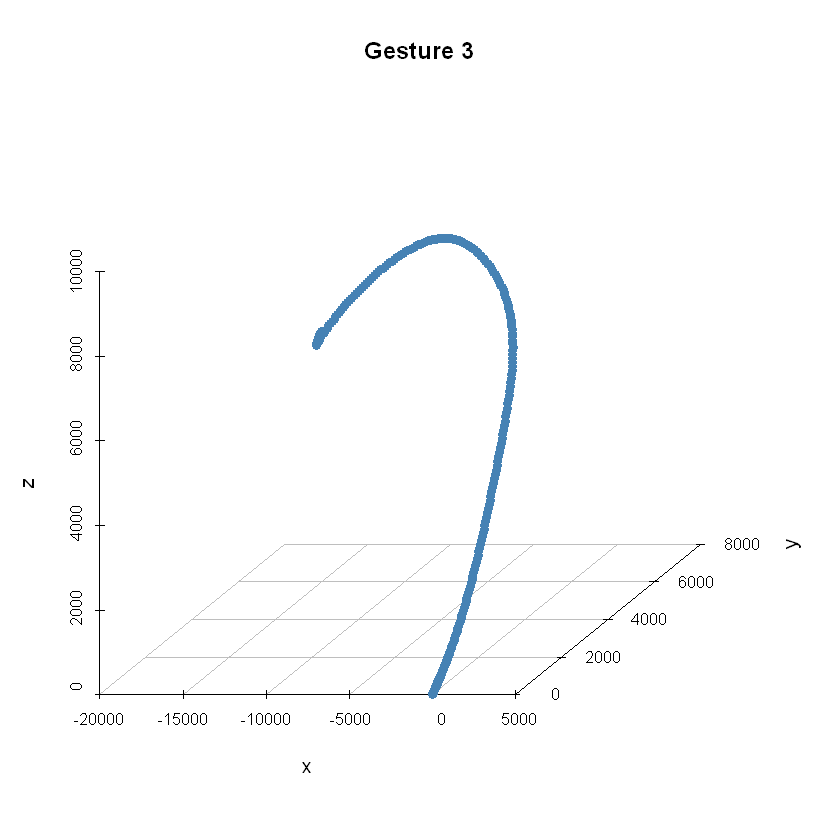

In [6]:
#visualize one instance from class 3
x_3= t(pos_x_new[3,-1])
y_3= t(pos_y_new[3,-1])
z_3= t(pos_z_new[3,-1])
comb_3 =cbind(x_3,y_3,z_3)
comb_3 = as.data.frame(comb_3)
colnames(comb_3)[1] = "x"
colnames(comb_3)[2] = "y"
colnames(comb_3)[3] = "z"
scatterplot3d(comb_3[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE, main="Gesture 3")

###### Since this graph is three dimensional, it does not look like the figure given in Homework. However, when we look at only in the x dimension, it shows similar pattern.

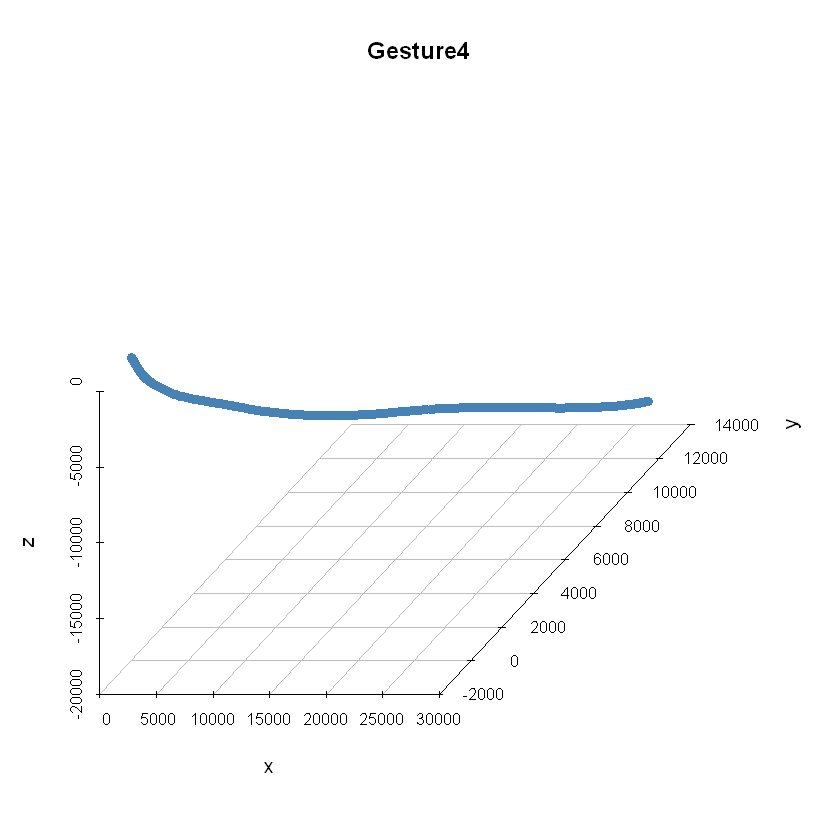

In [7]:
#visualize one instance from class 4
x_4= t(pos_x_new[4,-1])
y_4= t(pos_y_new[4,-1])
z_4= t(pos_z_new[4,-1])
comb_4 =cbind(x_4,y_4,z_4)
comb_4 = as.data.frame(comb_4)
colnames(comb_4)[1] = "x"
colnames(comb_4)[2] = "y"
colnames(comb_4)[3] = "z"
scatterplot3d(comb_4[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,,main="Gesture4")

###### When we look at from the y axis, the graph seems similiar with the Figure given in homework.

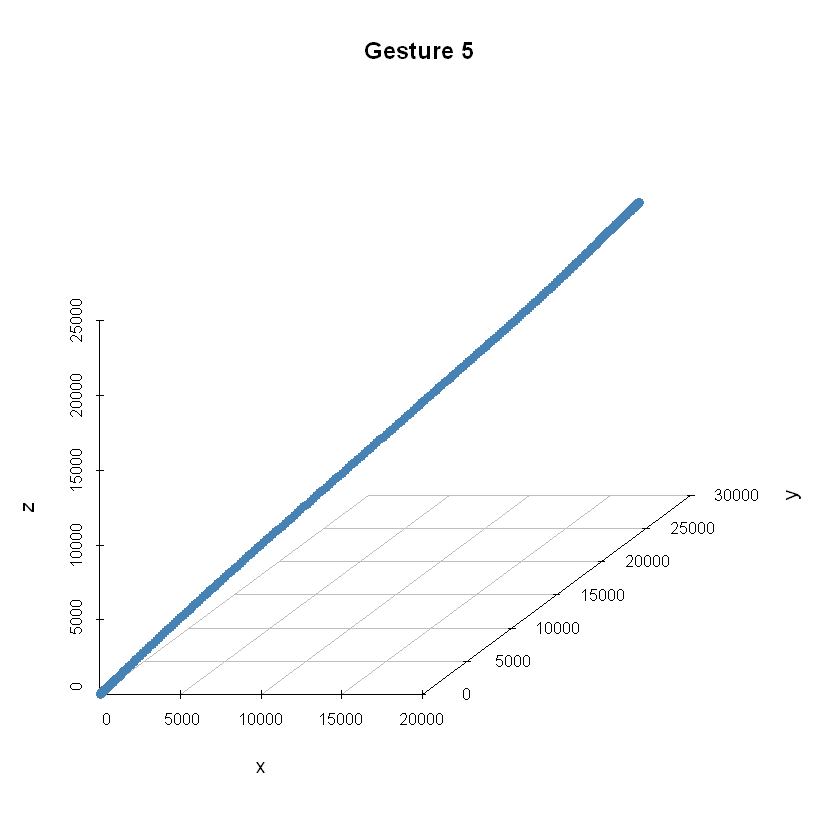

In [8]:
#visualize one instance from class 5
x_5= t(pos_x_new[5,-1])
y_5= t(pos_y_new[5,-1])
z_5= t(pos_z_new[5,-1])
comb_5 =cbind(x_5,y_5,z_5)
comb_5 = as.data.frame(comb_5)
colnames(comb_5)[1] = "x"
colnames(comb_5)[2] = "y"
colnames(comb_5)[3] = "z"
scatterplot3d(comb_5[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,main="Gesture 5")

###### This instance is similiar with the figure given in homework when we neglect the z dimension.

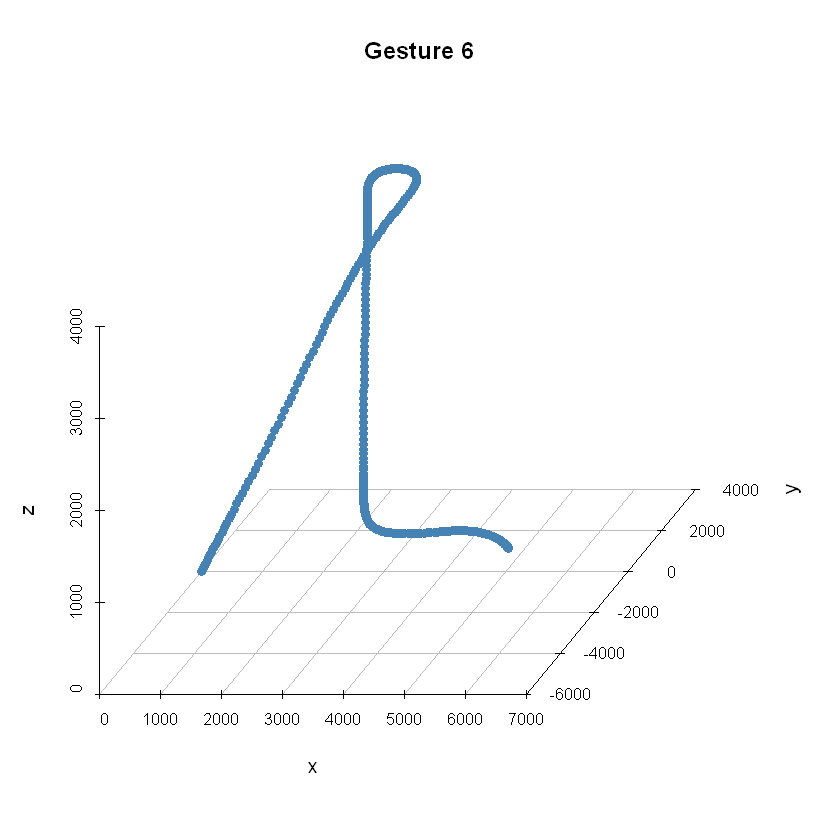

In [9]:
#visualize one instance from class 6
x_6= t(pos_x_new[6,-1])
y_6= t(pos_y_new[6,-1])
z_6= t(pos_z_new[6,-1])
comb_6 =cbind(x_6,y_6,z_6)
comb_6 = as.data.frame(comb_2)
colnames(comb_6)[1] = "x"
colnames(comb_6)[2] = "y"
colnames(comb_6)[3] = "z"
scatterplot3d(comb_6[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,main="Gesture 6")

###### When the last part of this graph is examined, it looks like the figure given in homework. The other half is dissimilar.

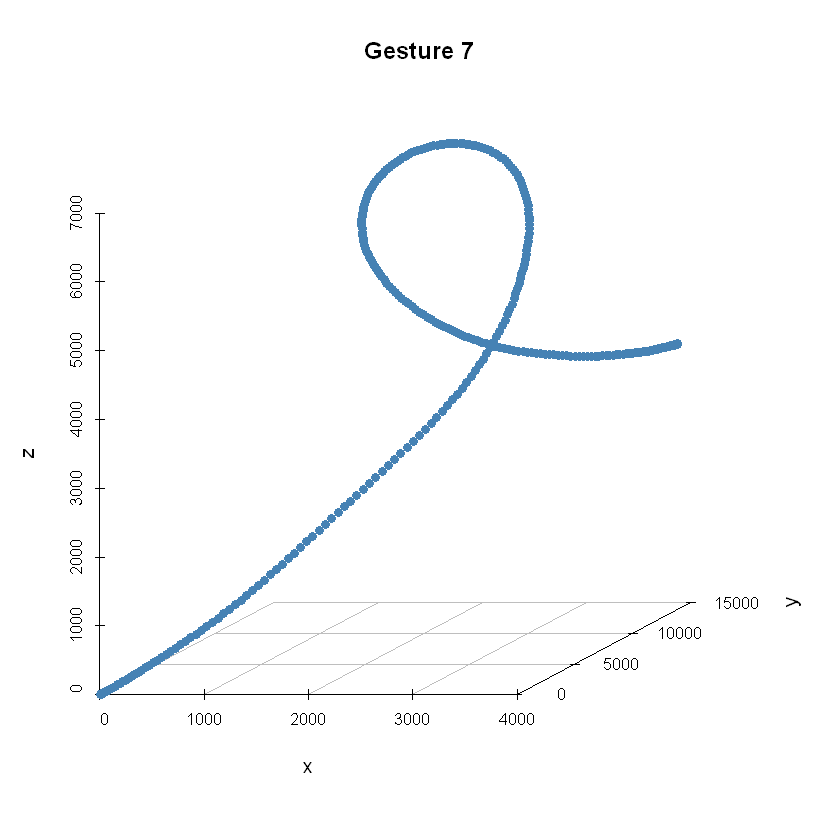

In [10]:
#visualize one instance from class 7
x_7= t(pos_x_new[7,-1])
y_7= t(pos_y_new[7,-1])
z_7= t(pos_z_new[7,-1])
comb_7 =cbind(x_7,y_7,z_7)
comb_7 = as.data.frame(comb_7)
colnames(comb_7)[1] = "x"
colnames(comb_7)[2] = "y"
colnames(comb_7)[3] = "z"
scatterplot3d(comb_7[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,main="Gesture 7")

###### Although the change in the shape of the circle is observed in this graphic like the figure given in homework, the graphic does not resemble the figure exactly.

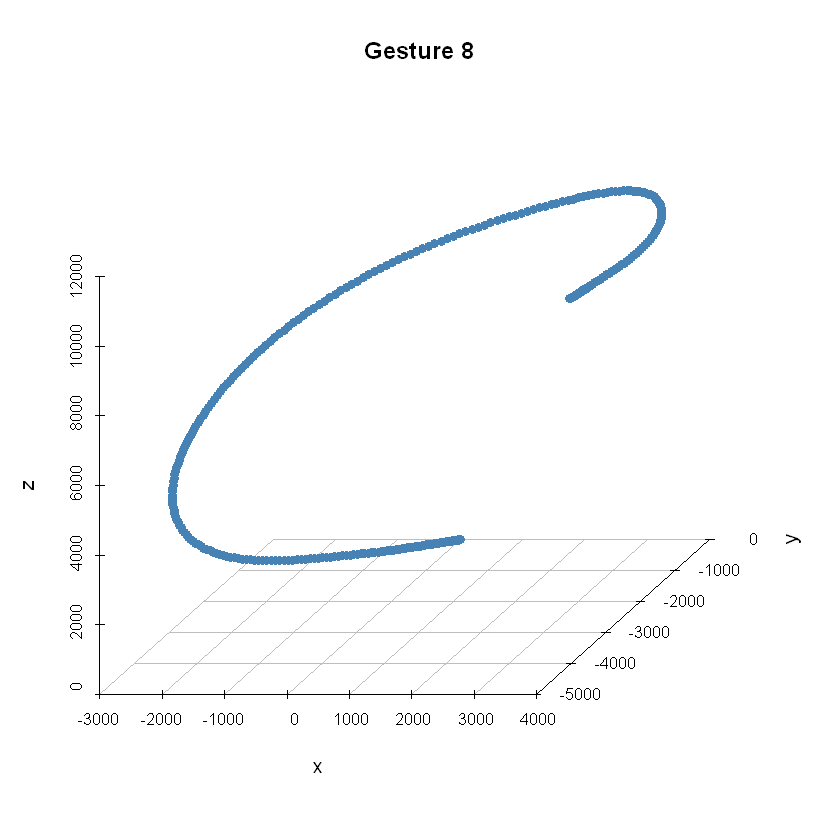

In [11]:
#visualize one instance from class 8
x_8= t(pos_x_new[8,-1])
y_8= t(pos_y_new[8,-1])
z_8= t(pos_z_new[8,-1])
comb_8 =cbind(x_8,y_8,z_8)
comb_8 = as.data.frame(comb_8)
colnames(comb_8)[1] = "x"
colnames(comb_8)[2] = "y"
colnames(comb_8)[3] = "z"
scatterplot3d(comb_8[,1:3], pch = 16, color = "steelblue", grid=TRUE, box=FALSE,main="Gesture 8")

###### This is the instance that is most similar to the figure given in the homework. If the Z axis is not taken into account, the exact same shape as the figure can be obtained.

## b) Univariate time series with a dimensionality reduction approach

In [12]:
#timeseries data is determined from the first raw 
timeseriesid = c(1:nrow(pos_x_data))
#timeseries data is inserted into position data
pos_x_time = cbind(timeseriesid,(pos_x_data))
pos_y_time = cbind(timeseriesid,(pos_y_data))
pos_z_time = cbind(timeseriesid,(pos_z_data))
#melt function is used to convert the dataframe into long format
molten_x = melt(data= pos_x_time, id.vars=c("timeseriesid","class"),variable.name="time",value.name="x")
molten_x = molten_x[order(molten_x$timeseriesid), ]

molten_y = melt(data= pos_y_time, id.vars=c("timeseriesid","class"),variable.name="time",value.name="y")
molten_y = molten_y[order(molten_y$timeseriesid), ]

molten_z = melt(data= pos_z_time, id.vars=c("timeseriesid","class"),variable.name="time",value.name="z")
molten_z = molten_z[order(molten_z$timeseriesid), ]

#position datas of x, y, and z is combined to generate long data with cbind
long_data= cbind(molten_x, molten_y[4], molten_z[4])
#column order is changed according to the case in the HW question
col_order = c("timeseriesid", "time", "x",
               "y", "z", "class")
long_data = long_data[, col_order]
#PCA calculation
pca = princomp(long_data[,3:5], cor=T)
print(summary(pca, loadings=T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2724995 1.0380930 0.5505524
Proportion of Variance 0.5397517 0.3592124 0.1010360
Cumulative Proportion  0.5397517 0.8989640 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
x  0.209  0.908  0.362
y  0.723  0.105 -0.683
z  0.658 -0.404  0.635


###### According to PCA result for whole data, it can be concluded that the standard deviation according to first component is calculated ad 1.272, which has the has the most proportion with the value of 0.540. Additionally, linear combination of first component is 0.209x + 0.723y + 0.658z. Since, we would like to obtain univariate time series, only first component of PCA is used, because it has the highest value of proportion of variance. So, it would represent the data better than other components.


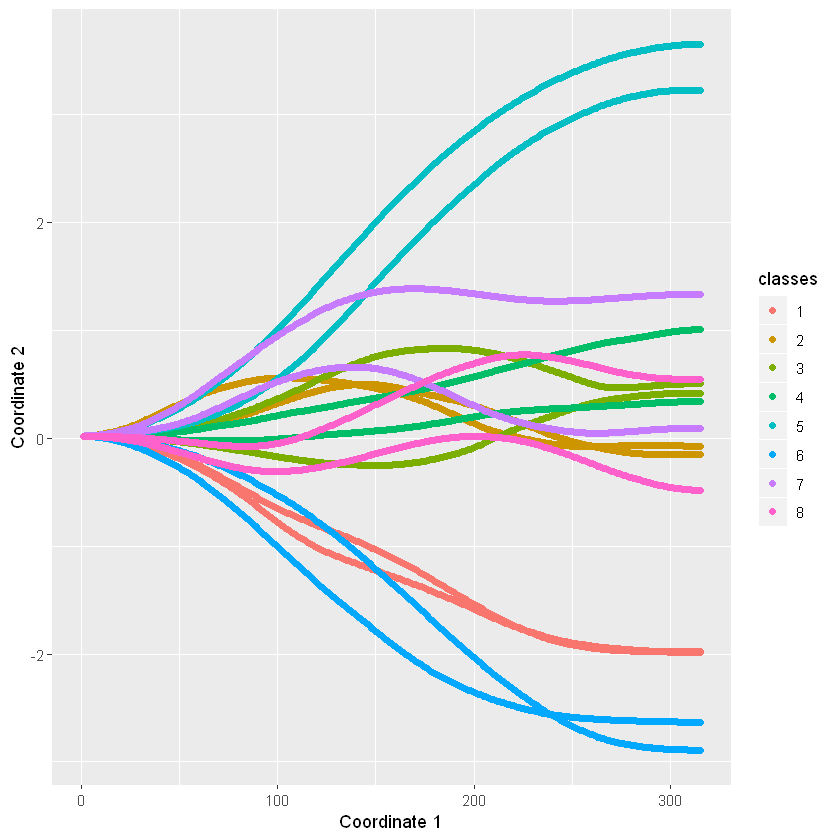

In [13]:
#First principal component of PCA is used to generate new data frame
pca_data= cbind(long_data$timeseriesid, long_data$time, long_data$class, pca$scores[,1])
pca_data = data.frame(pca_data)
colnames(pca_data)[1] = "timeseriesid"
colnames(pca_data)[2] = "time"
colnames(pca_data)[3] = "class"
colnames(pca_data)[4] = "PCA"
pca_data = data.frame(pca_data)

#Data frame is filtered for each class and 2 variable
data_1 = pca_data %>% filter(class == 1)
data_1 = data_1 %>% filter(timeseriesid==11 | timeseriesid==893)

data_2 = pca_data %>% filter(class == 2)
data_2 = data_2 %>% filter(timeseriesid==15 | timeseriesid==894)

data_3 = pca_data %>% filter(class == 3)
data_3 = data_3 %>% filter(timeseriesid==4 | timeseriesid==892)

data_4 = pca_data %>% filter(class == 4)
data_4 = data_4 %>% filter(timeseriesid==5 | timeseriesid==889)

data_5 = pca_data %>% filter(class == 5)
data_5 = data_5 %>% filter(timeseriesid==2 | timeseriesid==896)

data_6 = pca_data %>% filter(class == 6)
data_6 = data_6 %>% filter(timeseriesid==1 | timeseriesid==890)

data_7 = pca_data %>% filter(class == 7)
data_7 = data_7 %>% filter(timeseriesid==7 | timeseriesid==895)

data_8 = pca_data %>% filter(class == 8)
data_8 = data_8 %>% filter(timeseriesid==6 | timeseriesid==882)

#Filtered data is combined with rbind function
data_comb = rbind(data_1,data_2,data_3,data_4,data_5,data_6,data_7, data_8)
data_comb = data.frame(data_comb)
#Visualization of filtered data frame with ggplot
ggplot(data_comb) + geom_point(aes(x=time, y=PCA, colour=as.factor(class))) + xlab("Coordinate 1") + ylab("Coordinate 2") + scale_color_discrete(name = "classes")


###### When the figure prepared using two different time series from each class is examined, it is observed that some class results show very close profiles with each other . For example, when two different time series data of class 1 are examined, it is observed that they almost completely overlap. However, this is not the case for some classes. For example, the results of class 7 differ significantly. 

## c) PCA on the Data From Each Gesture

In [14]:
#Filter the data for each class
long_data_1 = long_data %>% filter(class == 1)
long_data_2 = long_data %>% filter(class == 2)
long_data_3 = long_data %>% filter(class == 3)
long_data_4 = long_data %>% filter(class == 4)
long_data_5 = long_data %>% filter(class == 5)
long_data_6 = long_data %>% filter(class == 6)
long_data_7 = long_data %>% filter(class == 7)
long_data_8 = long_data %>% filter(class == 8)
#Calculate pca on the data from each class
pca1 = princomp(long_data_1[,3:5], cor=T)
print(summary(pca1, loadings=T))
pca2 = princomp(long_data_2[,3:5], cor=T)
print(summary(pca2, loadings=T))
pca3 = princomp(long_data_3[,3:5], cor=T)
print(summary(pca3, loadings=T))
pca4 = princomp(long_data_4[,3:5], cor=T)
print(summary(pca4, loadings=T))
pca5 = princomp(long_data_5[,3:5], cor=T)
print(summary(pca5, loadings=T))
pca6 = princomp(long_data_6[,3:5], cor=T)
print(summary(pca6, loadings=T))
pca7 = princomp(long_data_7[,3:5], cor=T)
print(summary(pca7, loadings=T))
pca8 = princomp(long_data_7[,3:5], cor=T)
print(summary(pca8, loadings=T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2932492 1.0091473 0.5559931
Proportion of Variance 0.5574978 0.3394594 0.1030428
Cumulative Proportion  0.5574978 0.8969572 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
x  0.119  0.973  0.198
y  0.693 -0.224  0.685
z  0.711        -0.701
Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.1286537 0.9457021 0.9120243
Proportion of Variance 0.4246197 0.2981175 0.2772628
Cumulative Proportion  0.4246197 0.7227372 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
x  0.535  0.814  0.224
y  0.613 -0.192 -0.767
z  0.581 -0.548  0.602
Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2156489 1.0027730 0.7187794
Proportion of Variance 0.4926008 0.3351846 0.1722146
Cumulative Proportion  0.4926008 0.8277854 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
x  0.709         0.705
y  0.371  0.847 -0.380


######  When the pca results for each class are investigated, it is seen that the value of standard deviation is in between 1.129 and 1.404 and proportion of  variance of first component is in between 0.425 and 0.657. When we compared this values with the values form pca results on whole data, it is deduced that standard deviation and proportion of variance is inbetween these values. Although the value of the first component pca results of most class is very close to the value calculated for all data, the 2nd and 5th class have a different value than the others (standard deviation of 2nd class=1.129 5th class=1.404.


## d)Applying multidimensional scaling 

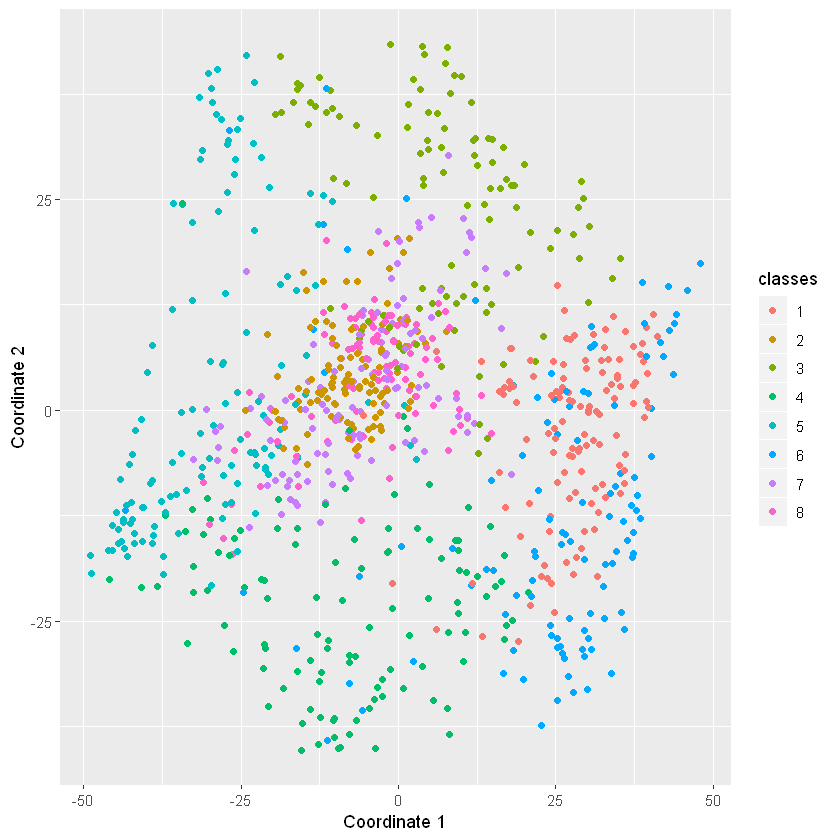

In [15]:
#Raw data is combined
data_bind = cbind(pos_x_data, pos_y_data[,-1], pos_z_data[,-1])
#Combined data is scaled with scale function
data_bind[,-1]= scale(data_bind[,-1]) 
#Euclidean distance is used to calculate distance matrix
euc_distance = dist(data_bind[,-1], method = "euclidean")
#Multidimensional scaling is applied with cmdscale function
dim_reduction = cmdscale(euc_distance,k=2)
#Class values are combined with the distance matrix
class_bind = cbind(pos_x_data$class,dim_reduction)
class_bind = as.data.frame(class_bind)
ggplot(class_bind) + geom_point(aes(x=V2, y=V3, colour=as.factor(V1))) + xlab("Coordinate 1") + ylab("Coordinate 2") + scale_color_discrete(name = "classes")


###### Multidimensional scaling is applied to obtain two dimensional data frame. However, it is hard to distinguish the gestures from the graph. For this reason, it can be deduced that, two dimensional data frame is not very useful to investigate the gestures. 

###### *J. Liu, Z. Wang, L. Zhong, J. Wickramasuriya, and V. Vasudevan. uWave: Accelerometer-based personalized gesture recognition and its applications. Pervasive Computing and Communications, IEEE International Conference on, 0:1-9, 2009.
